<a href="https://colab.research.google.com/github/MarinaSokolova111/Lab/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9B%D0%B0%D0%B1_4_3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

Мы импортируем все библиотеки и сохраняем URL в переменной. Затем мы делаем HTTP запросить этот URL-адрес с помощью метода get для получения информации с этой веб-страницы.
Текстовый атрибут объекта запросов содержит данные HTML, которые передаются в функция pd.read_html. Эта функция возвращает список объектов DataFrame, содержащих различные таблицы на веб-странице. Поскольку на веб-странице есть только одна таблица, DataFrame (df) содержит только одну таблицу.

In [3]:
#importing the libraries
import requests # Библиотека запросов  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]


Изучаем  первые 5 записей: 

In [4]:
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


Получение типов данных и пропущенных значений:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


Как мы видим, типы данных столбцов не в нужном нам формате. Gross столбец представляет собой числовой столбец. Однако этому столбцу был назначен тип данных объекта, поскольку он содержит как числовые, так и нечисловые
данные (символы типа “,”, “$”  и буквы типа «U» и «S»). Преобразуем данные:

# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

Удалим ненужные строки из столбца **Gross**, оставив только
числовые значения:

In [6]:
df['Gross']=df['Gross'].str.replace(r"US\$", "").str.replace(r",", "")

 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [7]:
df['Gross']= df['Gross'].astype('int64')

check:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     int64 
 4   Notes   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [9]:
df['Gross'].head(5)

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

Нам также нужно извлечь месяц из даты, сначала изменив тип данных столбца «Дата» и затем применив к нему метод **DatetimeIndex**, как показано ниже:

In [10]:
df['Date']=df['Date'].astype('datetime64')

In [11]:
df['Month']=pd.DatetimeIndex(df['Date']).month

Наконец, мы удаляем два ненужных столбца из DataFrame, используя следующие
утверждение.

In [12]:
df.drop(['#', 'Notes'], axis=1, inplace=True)

# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [13]:
df1=df[['Film', 'Gross']].sort_values(ascending=False,by='Gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [14]:
#df1.drop(['index'],axis=1,inplace=True)

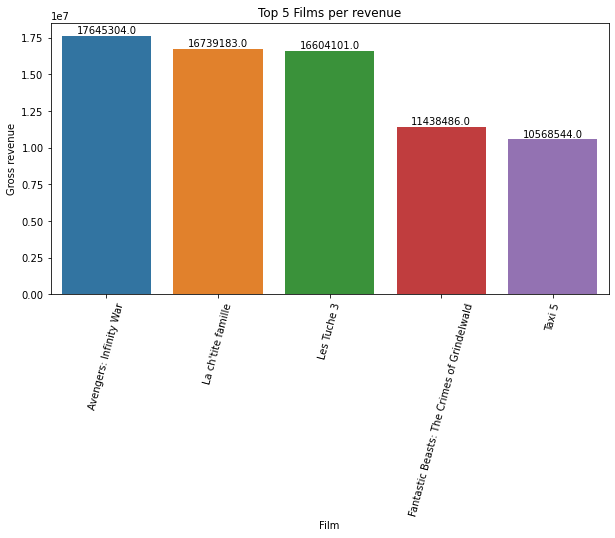

In [15]:
plt.figure(figsize=(10,5))

ax=sns.barplot(x='Film',y='Gross',data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top 5 Films per revenue")
ax.set_ylabel("Gross revenue")

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

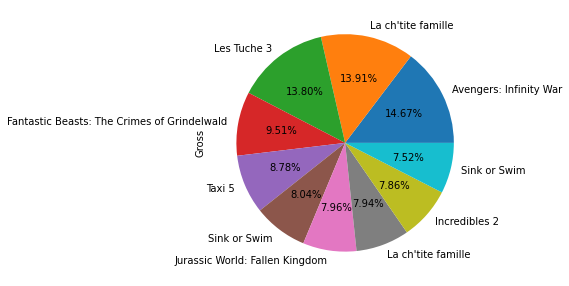

In [16]:
df1['Gross'].head(10).plot(kind='pie', autopct='%.2f%%', labels=df1['Film'], figsize=(10,5))

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

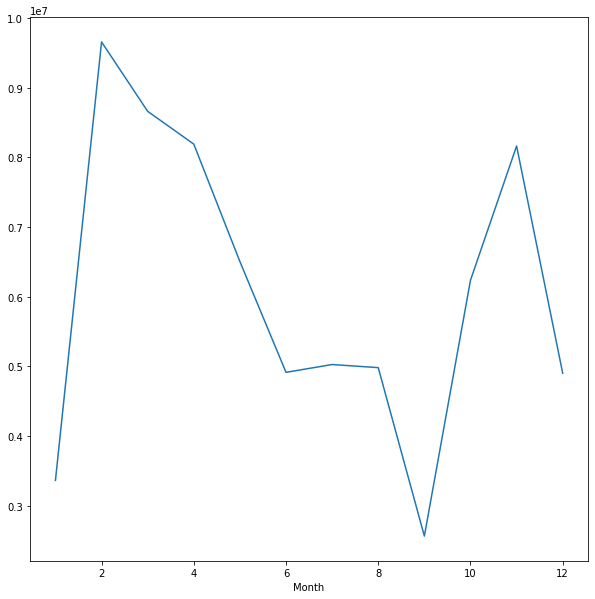

In [34]:
df2=df.groupby('Month')['Gross'].mean()
df2.plot(kind='line', figsize=(10,10))

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Средний ежемесячный доход сильно колеблется, возможно
зависит от месяца выпуска фильмов, который может требуют дальнейшего анализа на протяжении многих лет.
  2. Три самых прибыльных фильма во Франции в 2018 году вышли Avengers, La Ch’tite Famille и Les Tuche 3.

# **Вариант 6**

**Вариант 6.** неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах Индонезии.
List of highest-grossing films in Indonesia


# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

In [18]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Indonesia'
req=requests.get(url)
data=pd.read_html(req.text)
data_frame=data[0]


Изучаем  первые 5 записей: 

In [19]:
data_frame.head()

,Rank,Title,Admissions,Distributor,Year,Director
0,1,Warkop DKI Reborn: Jangkrik Boss! Part 1,6858616,Falcon Pictures,2016,Anggy Umbara
1,2,Dilan 1990,6315664,Max PicturesFalcon Pictures,2018,Fajar BustomiPidi Baiq
2,3,Dilan 1991,5253411,Max Pictures,2019,Fajar BustomiPidi Baiq
3,4,Laskar Pelangi,4719453,Miles Films,2008,Riri Riza
4,5,Habibie & Ainun,4583641,MD Pictures,2012,Faozan Rizal


In [20]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         77 non-null     int64 
 1   Title        77 non-null     object
 2   Admissions   77 non-null     int64 
 3   Distributor  77 non-null     object
 4   Year         77 non-null     int64 
 5   Director     77 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.7+ KB


# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

In [21]:
data_frame.drop(['Director', 'Rank', 'Distributor'], axis=1, inplace=True)

In [22]:
data_frame

,Title,Admissions,Year
0,Warkop DKI Reborn: Jangkrik Boss! Part 1,6858616,2016
1,Dilan 1990,6315664,2018
2,Dilan 1991,5253411,2019
3,Laskar Pelangi,4719453,2008
4,Habibie & Ainun,4583641,2012
...,...,...,...
72,Air Terjun Pengantin,1060058,2009
73,Sweet 20,1044045,2017
74,XL - Extra Large,1032160,2008
75,Quickie Express,1018654,2007


In [23]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       77 non-null     object
 1   Admissions  77 non-null     int64 
 2   Year        77 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


# **Шаг 3: Визуализация**

In [24]:
data_frame1=data_frame[['Title', 'Admissions']].sort_values(ascending=False, by='Admissions')

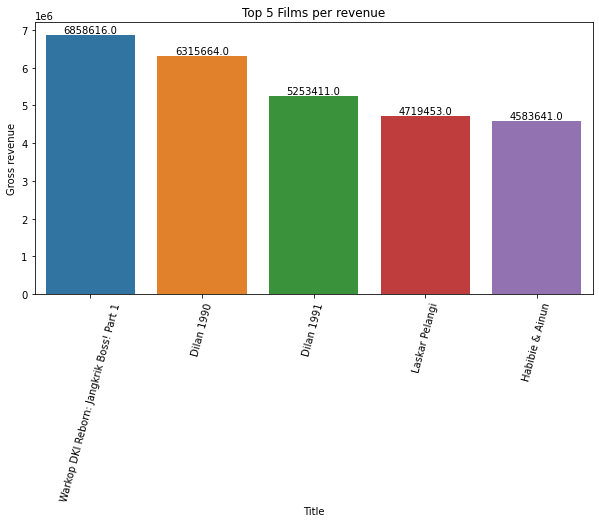

In [25]:
plt.figure(figsize=(10,5))

ax=sns.barplot(x='Title',y='Admissions',data=data_frame.head(5))
ax.set_xticklabels(labels=data_frame.head()['Title'],rotation=75)
ax.set_title("Top 5 Films per revenue")
ax.set_ylabel("Gross revenue")

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

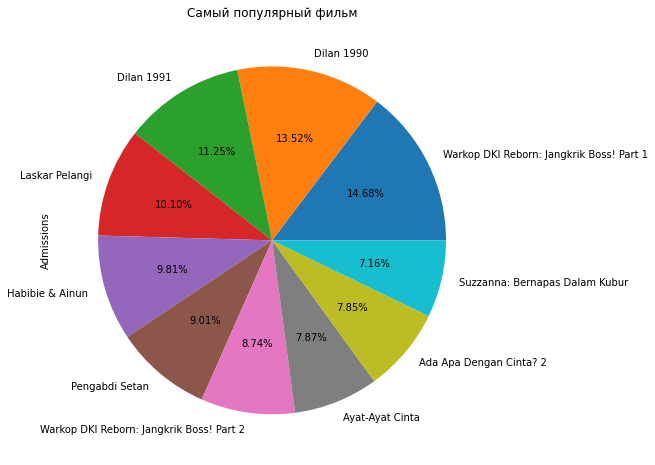

In [26]:
data_frame['Admissions'].head(10).plot(kind='pie', autopct='%.2f%%', labels=data_frame['Title'], figsize=(10,8), title='Самый популярный фильм')

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

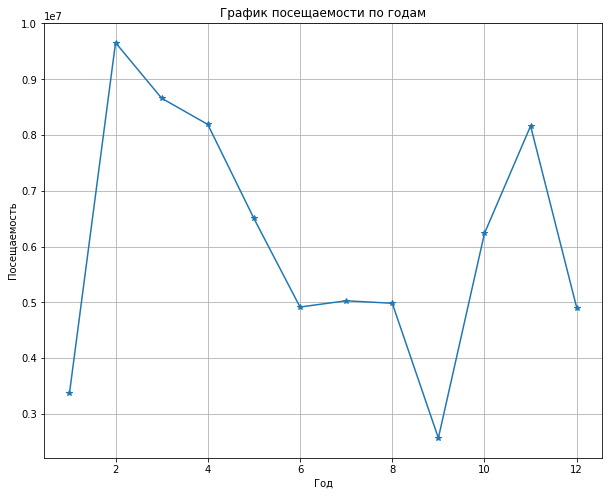

In [33]:
data_frame2=data_frame.groupby('Year')['Admissions'].mean()
df2.plot(kind='line',figsize=(10,8), title='График посещаемости по годам', xlabel='Год', ylabel='Посещаемость', grid=True, marker='*')

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Самый популярный фильм Warkop DKI Reborn: Jangkrik Boss! Part 1
  2. Самым посещаемый является 2012 год